In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('combined_health_data.csv')

# Inspect the data
print(data.head())


         date          Id       mean  max  min  TotalSleepRecords  SleepHours  \
0  2016-04-12  4020332650  83.499014  133   49                  1    8.350000   
1  2016-04-12  5553957443  64.365114  106   50                  1    7.350000   
2  2016-04-12  5577150313  65.656074  154   41                  1    6.983333   
3  2016-04-12  6962181067  85.036320  176   47                  1    6.100000   
4  2016-04-12  8792009665  68.921576  135   48                  1    7.633333   

   TimeInBedHours  Calories  StepTotal  
0        9.016667      3654       8539  
1        7.733333      2026      11596  
2        7.300000      3405       8135  
3        6.450000      1994      10199  
4        8.216667      2044       2564  


date                 0
Id                   0
mean                 0
max                  0
min                  0
TotalSleepRecords    0
SleepHours           0
TimeInBedHours       0
Calories             0
StepTotal            0
dtype: int64
                 Id        mean         max         min  TotalSleepRecords  \
count  1.820000e+02  182.000000  182.000000  182.000000         182.000000   
mean   5.565561e+09   73.615234  135.467033   49.923077           1.120879   
std    1.651355e+09    8.295873   22.100137    6.159448           0.359102   
min    2.026352e+09   59.377175   80.000000   36.000000           1.000000   
25%    4.388162e+09   67.049029  123.000000   44.250000           1.000000   
50%    5.577150e+09   73.043697  133.000000   50.500000           1.000000   
75%    6.962181e+09   79.368192  148.750000   54.000000           1.000000   
max    8.792010e+09  104.871472  199.000000   70.000000           3.000000   

       SleepHours  TimeInBedHours     Calories     Ste

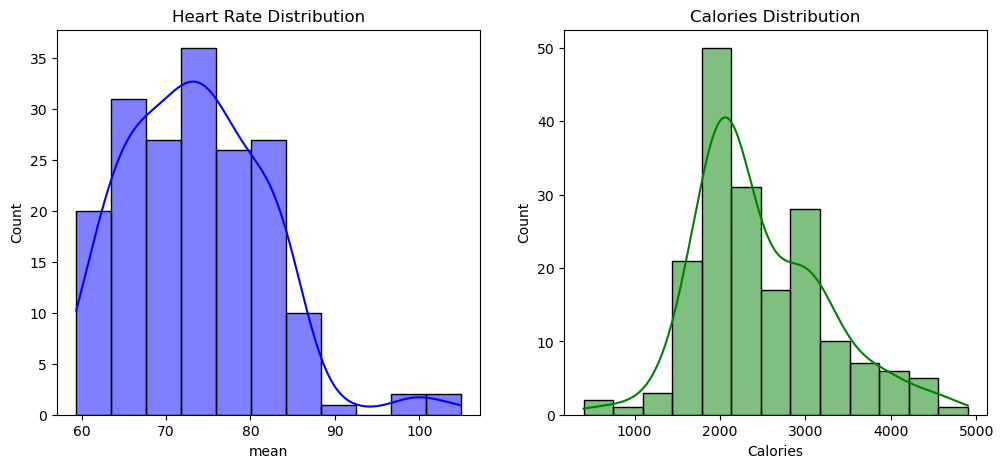

In [2]:
# Check for missing values
print(data.isnull().sum())

# Display the statistical summary of the dataset
print(data.describe())

# Optional: Plot some data distributions (if needed)
import matplotlib.pyplot as plt
import seaborn as sns

# Plot distribution of heart rate ('mean' column) and calories
plt.figure(figsize=(12, 5))

# Heart rate distribution (use 'mean' instead of 'Value')
plt.subplot(1, 2, 1)
sns.histplot(data['mean'], kde=True, color='blue')  # 'mean' refers to heart rate
plt.title('Heart Rate Distribution')

# Calories distribution
plt.subplot(1, 2, 2)
sns.histplot(data['Calories'], kde=True, color='green')
plt.title('Calories Distribution')

plt.show()

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Features (based on the actual column names in your data)
X = data[['mean', 'SleepHours', 'TimeInBedHours', 'Calories', 'StepTotal']]

# Since you don't have a 'StressLevel' column, you'll need to define a target.
# For now, let's assume we're creating a 'HighStress' binary label:
# High stress if heart rate is above a threshold, calories are high, and sleep is low (you can adjust this logic).
data['HighStress'] = ((data['mean'] > 90) & (data['Calories'] > 2500) & (data['SleepHours'] < 7)).astype(int)

# Target variable
y = data['HighStress']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (optional, but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the RandomForestClassifier
model = RandomForestClassifier(random_state=42)

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.972972972972973

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.00      0.00      0.00         1

    accuracy                           0.97        37
   macro avg       0.49      0.50      0.49        37
weighted avg       0.95      0.97      0.96        37



C:\Users\makis\PYTHON\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\makis\PYTHON\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\makis\PYTHON\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [4]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Modify the RandomForestClassifier to handle class imbalance by assigning a class_weight parameter
model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Train the model
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.972972972972973

Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        36
           1       0.00      0.00      0.00         1

    accuracy                           0.97        37
   macro avg       0.49      0.50      0.49        37
weighted avg       0.95      0.97      0.96        37



C:\Users\makis\PYTHON\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\makis\PYTHON\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\makis\PYTHON\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [5]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [6]:
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Features (based on the actual column names in your data)
X = data[['mean', 'SleepHours', 'TimeInBedHours', 'Calories', 'StepTotal']]

# Target variable
y = data['HighStress']

# Apply Random Oversampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Scale the features (optional, but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the model on the resampled data
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        34

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72



In [7]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())


Cross-validation accuracy scores: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0


In [8]:
model = RandomForestClassifier(random_state=42, max_depth=3, n_estimators=10, class_weight='balanced')

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Initialize Logistic Regression with regularization
model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

# Train the model
model.fit(X_train_scaled, y_train)

# Evaluate using cross-validation
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='accuracy')
print("Cross-validation accuracy scores:", cv_scores)
print("Mean cross-validation accuracy:", cv_scores.mean())

Cross-validation accuracy scores: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.metrics import classification_report, accuracy_score

# Features and target variable
X = data[['mean', 'SleepHours', 'TimeInBedHours', 'Calories', 'StepTotal']]  # Features
y = data['HighStress']  # Target

#  Apply Random Oversampling to balance the dataset
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X, y)

#  Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

#  Scale the features (fit on X_train, transform both X_train and X_test)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform on training data
X_test_scaled = scaler.transform(X_test)  # Only transform on test data

# Initialize the Logistic Regression model
model = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)

#  Train the model
model.fit(X_train_scaled, y_train)

#  Make predictions on the test set
y_pred = model.predict(X_test_scaled)

#  Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9583333333333334

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.92      0.96        38
           1       0.92      1.00      0.96        34

    accuracy                           0.96        72
   macro avg       0.96      0.96      0.96        72
weighted avg       0.96      0.96      0.96        72



In [11]:
from sklearn.model_selection import GridSearchCV

param_grid = {'C': [0.1, 1, 10, 100], 'solver': ['liblinear', 'lbfgs']}
grid = GridSearchCV(LogisticRegression(random_state=42, class_weight='balanced'), param_grid, cv=5)
grid.fit(X_train_scaled, y_train)

print("Best Parameters:", grid.best_params_)

Best Parameters: {'C': 1, 'solver': 'liblinear'}


In [12]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)
print("Cross-validation accuracy:", cv_scores.mean())

Cross-validation accuracy: 1.0


In [13]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Initialize RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')

# Perform cross-validation to evaluate
rf_cv_scores = cross_val_score(rf_model, X_train_scaled, y_train, cv=5)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Evaluate the model on the test set
y_pred_rf = rf_model.predict(X_test_scaled)
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))

# Cross-validation results
print("Random Forest Cross-validation accuracy:", rf_cv_scores.mean())

Random Forest Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        38
           1       1.00      1.00      1.00        34

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72

Random Forest Cross-validation accuracy: 1.0


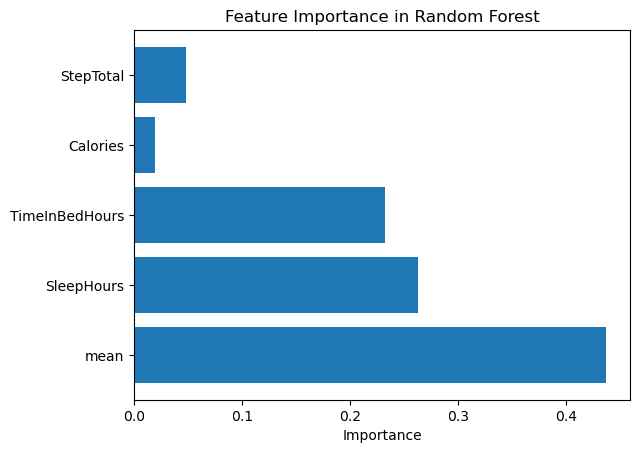

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


In [15]:
# Random Forest Feature Importance
import matplotlib.pyplot as plt
feature_importance = rf_model.feature_importances_
feature_names = X.columns
plt.barh(feature_names, feature_importance)
plt.xlabel('Importance')
plt.title('Feature Importance in Random Forest')
plt.show()